### Dropped from na02approximation.ipynb

Move to M104C


![Chebychev polynomial 3](https://jhparkyb.github.io/resources/notes/na/104ASlides_Approximation021.png)

##### Divided differences

![Divided differences 1](https://jhparkyb.github.io/resources/notes/na/104ASlides_Approximation026.png)

![Divided differences 2](https://jhparkyb.github.io/resources/notes/na/104ASlides_Approximation027.png)

![Divided differences 3](https://jhparkyb.github.io/resources/notes/na/104ASlides_Approximation028.png)

##### Horner's algorithm: efficient evaluation of interpolation

Efficient way of evaluating polynomails.

![Example of Horner's algorithm](https://jhparkyb.github.io/resources/notes/na/104ASlides_Approximation010.png)

![Finding interpolating polynomial in the Newton form 2](https://jhparkyb.github.io/resources/notes/na/104ABoardWork_Approximation002.png)

swapping
<!-- **Motivating example**

See the example below. There are no errors or bugs in the function `gauss_elimination2D`. But it produces something weird: `x_lib` is the correct solution, which is obtained by `numpy.linalg` (which uses LAPACK library). What has happened? -->

swapping
<!-- import numpy as np

def gauss_elimination2D(AA, bb):
    """Solves Ax = b using Gauss elimination.

    Args:
        A: A square matrix.
        b: A vector.

    Returns:
        x: A vector.
    """
    n = 2
    AA = A.copy()
    bb = b.copy()
    x = np.zeros(n).reshape(-1, 1)

    m = AA[1, 0] / AA[0, 0]
    AA[1, 1] -= m * AA[1, 0]
    bb[1] -= m * bb[0]
    
    x[1] = bb[1] / AA[1, 1]
    x[0] = (bb[0] - AA[0, 1] * x[1]) / AA[0, 0]
    
    return x

A = np.array([[10e-20,  1.], 
              [     1.,  2.]])
b = np.array([1., 4.]).reshape(-1, 1)

x_naive = gauss_elimination2D(A, b)
x_lib = np.linalg.solve(A, b)

print("x_naive: \n", x_naive)
print("x: \n", x) -->

<!-- #### Inner product

Inner product is a far-reaching concept that helps us tackle differential geometry, Fourier analysis, solutions of partial differential equations just to name a few. Here, we give just a bit more details to see if the $$(f,g)_w:=\int_a^b f(x)g(x)w(x)dx$$ is indeed an inner product. -->


#### Pivoting

<!-- **Motivating example**

Recall the homework problem, where we solved the following linear system by programming 2D version of Gaussian elimination.

$$
\left\{
\begin{aligned}
10^{-20} x_1+x_2 & =1 \\
x_1+2 x_2 & =4
\end{aligned}
\right. 
$$

If we programmed "right," it should produce $(x_1, x_2)\approx(0,1)$, while the package `numpy.linalg.solve` gave $(x_1, x_2)\approx(2,1)$. 

What is going on? -->

<!-- **Remark**

- The source of error is that the first coefficient `A[0,0]` is so small that the computer (using IEEE double precision) "thinks" it is 0. 

$$
\left\{
\begin{aligned}
10^{-20} x_1+x_2 & =1 \\
x_1+2 x_2 & =4
\end{aligned}
\right. 
\Rightarrow
\left\{
\begin{aligned}
0 x_1+x_2 & =1 \\
x_1+2 x_2 & =4
\end{aligned}
\right. 
$$

Then, the first equation leads to $x_2=1$, which in turn, leads to $x_1 = 0$. Hence, we have $(x_1, x_2)\approx(0,1)$. 

- However, if we carry the small coefficient $10^{-20}$ and meticulously solve the equation, we obtain $(x_1, x_2)\approx(2,1)$. -->

<!-- **Idea** (Swapping or partial pivoting)

- Push down a row whose pivot is small, and pull up the one with the largest coefficient in that column.
- This procedure is called *partial pivoting*. -->

**Remark**

According to Sauer (2017) Numerical Analysis 3rd ed., the practical difference among the different types of PDE is:
- parabolic and hyperbolic
  - PDE is defined on an open region.
  - Boundary conditions for one variable are specified at one end of the region (initial state) and the system is solved by moving away from the boundary. (Think of time evolution.)
- elliptic
  - PDE is defined on the entire boundary of a closed region.
  - Boundary conditions are imposed literally on the boundary of the region.

___

To do: INCLUDE MORE COMPLETE EXPOSITION

**Remark** (Why try to avoid `for` loop in Python)

- Python `int` is not purely an integer, it is an object. (See code below.)
- When `for` loop is implemented, it takes out only pure integer part and work. (More process)
- Python lacks JIT (just-in-time compilation). 
  - Python is an interpreter. Hence, it executes each line.
  - But for `for` loop, interpreting each line is waste of time. We want just repeat the same task, and carry out the whole `for` loop as a single command.
  - If those lines are skipped while interpreting, and executed directly during the run time, a lot of computing time can be saved.

In [ ]:
# Python int is not purely an integer, it is an object.

i = 34

print(type(i))
print(id(i))
print(i.to_bytes(length=1))

<class 'int'>
9822216
b'"'


___

**Example** (Rewriting to avoid loss of significand)

Suppose that your project involves the following computation near $x = 0$ for a fixed value $a > 0$: 

$$
\sqrt{x^2 + a^2} - a .
$$

Rewrite this expression to avoid loss of significant digits along the computation.


**Answer**

The quantity can be rewritten as 

$$
\left(\sqrt{x^2+a^2}-a\right)\left(\frac{\sqrt{x^2+a^2}+a}{\sqrt{x^2+a^2}+a}\right)=\frac{x^2}{\sqrt{x^2+a^2}+a}
$$

We can use the last term in place of what's given in the example.

Let us assume the following, which is totally made up for illustrative purposes. 

- Our computer uses decimals, instead of binary.
- Our computer uses six-decimal-digit mantissa, including the integer part, floating point number system along with power of tens as scalar.
- $x=0.01$ and $a = 3$

Then, the input will be stored as

- $x^2 + a^2 = 9.00010 \times 10^0$
- $a = 3.00000 \times 10^0$

1. Original formula

Even assuming infinite precision for evaluating square root, the square root is stored as

- $\sqrt{x^2 + a^2} = 3.00002 \times 10^0$ (more precise value is $\sqrt{9.00010}=3.0000166666203705$)
- $\sqrt{x^2 + a^2} - a = 0.00002 = 2.0\times 10^{-5}$. $\longrightarrow$ (Only one significant digit) 

2. Rewritten formula

$$
\frac{x^2}{\sqrt{x^2+a^2}+a} = \frac{0.0001}{3.00002 + 3.00000} = 4.10000 \times 10^{-5}
$$

(More precise value is $\frac{0.0001}{3.00002 + 3.00000} = 0.00004082476100517466$)

In [ ]:
import numpy as np
x = 9.0001
a = 3.
print(np.sqrt(x))
print(0.0001/(np.sqrt(3.00002 + 3.00000)))

3.0000166666203705
4.082476100517466e-05


___

#### Python package for least square method (To be desired)

In [ ]:
import numpy as np

# 1. Create A and b for a least square problem
A = np.arange(3*5, dtype=np.float64).reshape((3,5))**2
b = np.arange(5, dtype=np.float64).reshape((5,1))**2

# 2. Solve the least square problem using pseudo inverse
x = np.linalg.pinv(A.T)@b

# 3. Check the result
print(A.T)
print(b)
print(x)

# 4. Check the residual
res = A.T@x - b
print(res)

# 5. Check the residual for the true solution (cheating)
x_ = np.array([1,0,0]).reshape((3,1))
print(A.T@x_ - b)

[[  0.  25. 100.]
 [  1.  36. 121.]
 [  4.  49. 144.]
 [  9.  64. 169.]
 [ 16.  81. 196.]]
[[ 0.]
 [ 1.]
 [ 4.]
 [ 9.]
 [16.]]
[[1.]
 [0.]
 [0.]]
[[0.00000000e+00]
 [1.33226763e-15]
 [5.32907052e-15]
 [1.24344979e-14]
 [2.13162821e-14]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


___

**Theorem** (Projection matrix)

For a matrix $A\in\mathbb{R}^{m\times n}$, 

$$
P=A\left(A^T A\right)^{-1} A^T
$$ 

defines the orthogonal projection from $\mathbb{R}^{m}$ onto column space of $A$. In particular, if $A=v$ (a single column), then 

$$
P=\frac{v v^T}{v^T v}
$$

defines the orthogonal projection from ${R}^{m}$ onto the line $\{\lambda v \ : \  \lambda \in \mathbb{R} \}$.

<!-- **Proof**

From the least square discussion, we already know that the vector $\bar{x} =\left(A^T A\right)^{-1} A^T b$ yields the projection of $b$ onto the column space of $A$. Thus, taking the linear combination of columns of $A$ with $\bar x$ being coefficients, we obtain the projected vector of $b$. In other words, the map given by 

$$
b \mapsto A\left(A^T A\right)^{-1} A^T b (=A\bar{x})
$$

defines a projection onto column space of $A$.

In particular, if $A$ consists of a single column $v$, then this reads 

$$
b \mapsto \frac{v v^T}{v^T v} b
$$

 -->


___

<!-- Numerical issue with classical Gram-Schmidt

```
d = 1e-10
A = np.array([[1, d, 0, 0], [1, 0, d, 0], [1, 0, 0, d]], dtype=np.float64)

A = A.T

Q, R = qr_red_GS(A)

print("Q^TQ\n", Q.T @ Q) # gives non-orthogonal for classical Gram-Schmidt
``` -->

___

<!-- **The last equality of Observation 1**

- Claim: $\| r- Q_{k+1}H_k c \|_2 = \| Q_{k+1}^T r - H_k c \|_2 $, 
- Simplify the settings
  - Put $Q:=Q_{k+1}$ and $c:=H_k c$, then the claim reads
  - $\| r - Q c \|_2 = \| Q^T r - c \|_2$.
- What is known
  - $Q\in R^{(k+1)\times k}$ has orthonomal columns, $c\in R^k$, $r\in \mathrm{span} Q$ ($= K_k$)
  - (lemma) $\| v \|_2 = \| Q^T v \|_2$ if columns of $Q$ are mutually orthonormal and $v\in\mathrm{span} Q$
- Apply the lemma to $v= r-Qc$, 
  - $Qc\in \mathrm{span} Q$ is obvious as a linear combination of columns of $Q$, and $r\in \mathrm{span} Q$ is already known, hence $v=r-Qc \in \mathrm{span} Q$. Therefore,
  - $\| r - Q c \|_2 = \| Q^T r - Q^T Q c \|_2=\| Q^T r - c \|_2$ since $Q^T Q = I$. -->

**Remark** (Orthogonality)

- The above theorem is a bona fide orthogonality with the *discrete $L^2$* inner product.
  - $(u, v)_{L_n^2}:=(1/\sqrt{n})\sum_{i=1}^n u_i \bar v_i$ for $u,v\in C^n$.
  - $[DFT(u)]_j = (u, \phi_j)_{L_n^2}$, where $\phi_j = [e^{j(2k\pi \mathfrak{i}/n)}]_{k=0}^{n-1}$.

### Eigenvalue problems


___

**Theorem** (Gershgorin's Theorem; Kincaid and Cheney (2002) p. 268)

The spectrum of an $n \times n$ matrix $A$ (that is, the set of its eigenvalues) is contained in the union of the following $n$ disks, $D_i$, in the complex plane:
$$
D_i=\left\{z \in \mathbb{C}:\left|z-a_{i i}\right| \leq \sum_{\substack{j=1 \\ j \neq i}}^n\left|a_{i j}\right|\right\} \quad(1 \leq i \leq n)
$$

Let $\lambda$ be any element of the spectrum of $A$. Select a vector $x$ such that $A x=\lambda x$ and $\|x\|_{\infty}=1$. Let $i$ be an index for which $\left|x_i\right|=1$. Since $(A x)_i=\lambda x_i$, we have
$$
\lambda x_i=\sum_{j=1}^n a_{i j} x_j
$$

Therefore,
$$
\left(\lambda-a_{i i}\right) x_i=\sum_{\substack{j=1 \\ j \neq i}}^n a_{i j} x_j
$$

Taking absolute values and using the triangle inequality and $\left|x_j\right| \leq 1=\left|x_i\right|$, we have
$$
\left|\lambda-a_{i i}\right| \leq \sum_{\substack{j=1 \\ j \neq i}}^n\left|a_{i j}\right|\left|x_j\right| \leq \sum_{\substack{j=1 \\ j \neq i}}^n\left|a_{i j}\right|
$$

Thus, $\lambda \in D_i$.

___

**Example** (Effect of powers of a matrix)

Create a 2-by-2 matrix $A$ and a vector $x$. Investigate what happens to $A^k x$ for $k=0,1,2,\cdots$. 

**Remark** (Change of basis)

- Given two linearly independent vectors $v_1, v_2\in R^{2\times 1}$, $P=[v_1 | v_2]\in R^{2\times 2}$ is a change of basis from $V=\{v_1=[1,2]^T, v_2 =[-2, 1]^T\}$ to $E=\{e_1, e_2\}$.
  - E.g., if $x=2v_1 + 3v_2$, then $[x]_V=[2,3]^T$. Thus, as a linear combination of columns of $P$, we have $P[x]_V=[v_1 | v_2][2, 3]^T=2v_1 + 3v_2=2[1,2]^T + 3[-2,1]^T=[-4, 7]^T=[x]_E$.
- $P^{-1}$ is a change of basis from $E$ to $V$.

In [ ]:
"""Effect of powers of a matrix"""

import numpy as np
import matplotlib.pyplot as plt

l1 = 3.     #short for (l)ambda
l2 = -0.5
D = np.diag([l1, l2])
v1 = np.array([2., -1.])
v2 = np.array([-1., 1.])

# P = [v1, v2]: change of basis {v1, v2} --> {e1, e2}
P = np.column_stack((v1, v2)) 
Pinv = np.linalg.inv(P)

A = P @ D @ Pinv

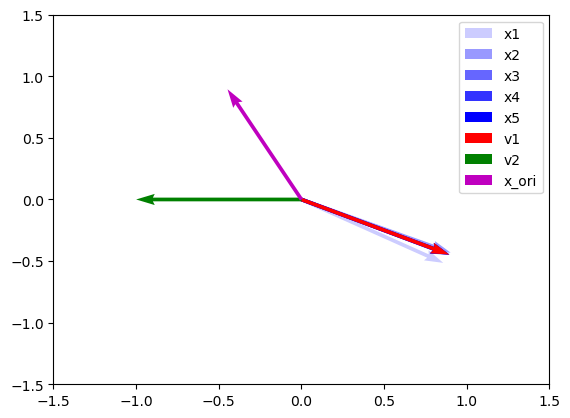

 A^5x = [ 0.89439269 -0.44728259] (normalized)
     v1 = [ 0.89442719 -0.4472136 ] (normalized)
     v2 = [-1.  0.] (normalized)
      x = [-0.4472136   0.89442719] (normalized)


In [ ]:
K = 5
x = np.array([-1., 2])
x = x/np.linalg.norm(x)
x_ori = x.copy()
v1 = v1/np.linalg.norm(v1)
v2 = v2//np.linalg.norm(v2)

for k in range(K):
    x = A@x
    x = x/np.linalg.norm(x)
    plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', label='x'+str(k+1), alpha=(k+1)/K)

# Plot the vectors
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2')
plt.quiver(0, 0, x_ori[0], x_ori[1], angles='xy', scale_units='xy', scale=1, color='m', label='x_ori')

# Set the x and y axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f" A^{K}x = {x} (normalized)")
print(f"     v1 = {v1} (normalized)")
print(f"     v2 = {v2} (normalized)")
print(f"      x = {x_ori} (normalized)")


___

**Remark** (Simultaneous Iteration)

- In practice, the first and last eigenvalues, the ones appearing in the first row and the last row of Simultaneous Iteration are often obtained relatively quickly. 
  - The first one corresponds to the result of Power Iteration applied to the first column of the initial matrix. 
  - The last one, remarkably, is the result of Inverse Power Iteration of the last column of initial matrix. 

___

**Summary** (Case I: $m\ge n$) 

- For any $m$-by-$n$ matrix $A$ ($m\ge n$), we can choose 
  - $\left\{u_1, \ldots, u_m\right\}$ orthonormal vectors of length $m$, (left singular vector)
  - $\left\{v_1, \ldots, v_n\right\}$ orthonormal vectors of length $n$, (right singular vector) and
  - $s_1 \geq \cdots \geq$ $s_{n} \geq 0$, (singular values) satisfying
$$
\begin{gathered}
A v_1=s_1 u_1 \\
A v_2=s_2 u_2 \\
\vdots \\
A v_n=s_n u_n .
\end{gathered}
$$


___

**Example** (Building SVD easy case; Sauer (2017) p. 580)

(Step 1)

Find the singular values and singular vectors for $A=\begin{bmatrix}3 & 0 \\ 0 & 1/2 \end{bmatrix}$. 


###### hide/show


$$
\begin{aligned} & A\left[\begin{array}{l}1 \\ 0\end{array}\right]=3\left[\begin{array}{l}1 \\ 0\end{array}\right] \\ & A\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{2}\left[\begin{array}{l}0 \\ 1\end{array}\right]\end{aligned}
$$


(Step 2)

Find the singular values and singular vectors for $A=\begin{bmatrix}0 & -1/2 \\ 3 & 0 \\ 0 & 0 \end{bmatrix}$.


###### hide/show



$$
\begin{aligned}
& A\left[\begin{array}{l}
1 \\
0
\end{array}\right]=3\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right] \\
& A\left[\begin{array}{l}
0 \\
1
\end{array}\right]=\frac{1}{2}\left[\begin{array}{r}
-1 \\
0 \\
0
\end{array}\right]
\end{aligned}
$$

Even for this simple matrix, guessing singular vectors is not that easy, especially when requiring the left singular vectors be orthogonal.

(Step 3) 

Can you do the same for $A=\begin{bmatrix}2 & -1/2 \\ 3 & 1 \\ -2 & 5 \end{bmatrix}$?

We need more systematic approach.


___

**Example** (Sauer (2017) p. 583)

Find the singular value decomposition of the $2 \times 3$ matrix
$$
A=\left[\begin{array}{rrr}
-1 & 3 & 7 \\
7 & 4 & 1
\end{array}\right] .
$$



Plan: Find the SVD of $A^T$ and then transpose the result. 

0. Preliminary

$$
A A^T=\left[\begin{array}{ll}
59 & 12 \\
12 & 66
\end{array}\right],
$$

1. Eigenvectors and eigenvalues 

$$
v_1=\begin{bmatrix}3 / 5 \\ 4 / 5\end{bmatrix}, 
\quad 
v_2=\begin{bmatrix}-4 / 5 \\ 3 / 5\end{bmatrix},
\quad
\begin{array}{l}
s_1^2=75 \\ 
s_2^2=50
\end{array}
$$


2. Singular values

$$
\begin{array}{l}
s_1=5 \sqrt{3} \\ 
s_2=5 \sqrt{2}
\end{array}
$$

3. Right singular vectors

$v_1, v_2$ (same as eigenvectors of $AA^T$)

4. Left singular vectors

From 

$$
5 \sqrt{3} u_1=A^T v_1=\left[\begin{array}{l}
5 \\
5 \\
5
\end{array}\right] \quad 5 \sqrt{2} u_2=A^T v_2=\left[\begin{array}{r}
5 \\
0 \\
-5
\end{array}\right]
$$

we have

$$
u_1=\left[\begin{array}{c}
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{3}}
\end{array}\right] \quad u_2=\left[\begin{array}{c}
\frac{1}{\sqrt{2}} \\
0 \\
-\frac{1}{\sqrt{2}}
\end{array}\right] .
$$

For $i = 3$, choose

$$
u_3=\left[\begin{array}{c} \frac{1}{\sqrt{6}} \\ -\frac{2}{\sqrt{6}} \\ \frac{1}{\sqrt{6}}
\end{array}\right]
$$ 


5. SVD of $A^T$

$$
A^T=\left[\begin{array}{rr}
-1 & 7 \\
3 & 4 \\
7 & 1
\end{array}\right]=\tilde U \tilde S \tilde V^T=\left[\begin{array}{rrr}
\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\
\frac{1}{\sqrt{3}} & 0 & -\frac{2}{\sqrt{6}} \\
\frac{1}{\sqrt{3}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}}
\end{array}\right]\left[\begin{array}{rr}
5 \sqrt{3} & 0 \\
0 & 5 \sqrt{2} \\
0 & 0
\end{array}\right]\left[\begin{array}{rr}
3 / 5 & 4 / 5 \\
-4 / 5 & 3 / 5
\end{array}\right],
$$

6. SVD of $A$ is

$$
A= \left[\begin{array}{rrr}
-1 & 3 & 7 \\
7 & 4 & 1
\end{array}\right]
=USV^T
=\left[\begin{array}{rr}
3 / 5 & 4 / 5 \\
-4 / 5 & 3 / 5
\end{array}\right]\left[\begin{array}{rrr}
5 \sqrt{3} & 0 & 0 \\
0 & 5 \sqrt{2} & 0
\end{array}\right]\left[\begin{array}{rrr}
\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{6}} & -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{6}}
\end{array}\right] .
$$

Here, we note $USV^T=\tilde V \tilde S^T \tilde U^T$ with equality holding factor-wisely.


7 Reduced SVD of $A$

$$
A=\left[\begin{array}{rrr}
-1 & 3 & 7 \\
7 & 4 & 1
\end{array}\right]
=U\hat S \hat V^T 
=\left[\begin{array}{rr}
3 / 5 & 4 / 5 \\
-4 / 5 & 3 / 5
\end{array}\right]\left[\begin{array}{rr}
5 \sqrt{3} & 0 \\
0 & 5 \sqrt{2}
\end{array}\right]\left[\begin{array}{rrr}
\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}
\end{array}\right] .
$$